# Goal of this workbook is to use various ensemble ML methods to classify animals in the Zoo dataset from Kaggle

https://www.kaggle.com/uciml/zoo-animal-classification?select=zoo.csv

In [44]:
# imports
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Visualizing Decision Trees
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt

#### Read in data

In [52]:
# Assumes the data is stored in a /data/ folder in same dir as notebook
class_df = pd.read_csv('./data/class.csv')
zoo_df = pd.read_csv('./data/class.csv')

In [5]:
class_df.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [22]:
print(len(zoo_df))
zoo_df.head()

101


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
zoo_df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
print(len(zoo_df['animal_name'].unique()))
print(list(zoo_df['animal_name'].unique()))

100
['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf', 'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam', 'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove', 'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat', 'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock', 'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly', 'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx', 'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum', 'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike', 'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion', 'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer', 'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel', 'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise', 'tuatara', 'tuna', 'vampire', 'vole', 'vulture', 'wallaby', 'wasp', 'wolf', 'worm', 'wren']


In [11]:
print(len(zoo_df.columns))
print(zoo_df.columns)

18
Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')


#### Split train/test data

In [45]:
# Setup parameters
X = zoo_df.drop(['animal_name','class_type'], axis=1)
y = zoo_df['class_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Fit decision tree with goal of classifying a species correctly, given various traits

In [46]:
# Instantiate DecisionTree object
#clf = tree.DecisionTreeClassifier(max_depth=3)  
clf = tree.DecisionTreeClassifier()  

# Train the tree
clf.fit(X, y)

DecisionTreeClassifier()

#### Plot decision tree

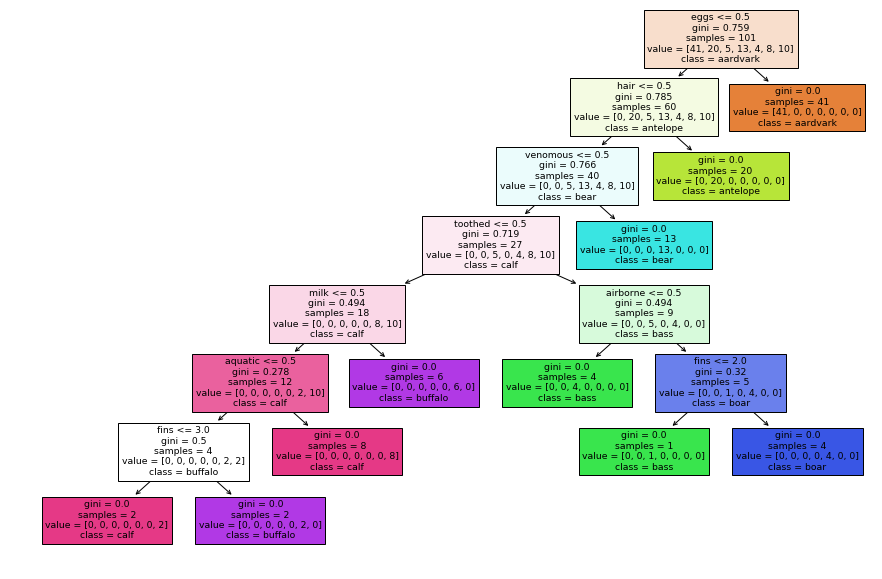

In [48]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=zoo_df.columns,  
                   class_names=zoo_df['animal_name'],
                   filled=True)

#### Interpreting the decision tree

The LEFT nodes evaluate to True and the RIGHT nodes evaluate to false in the parent node condition

- gini = 0 to 1 range representing the probability of a randomly chosen observation to be INCORRECTLY classified (measure of randomness/variance)
- samples = number of samples that fall into the current node's category/classification
- value = shows a distribution of the samples classified to this nodes class (its a list with n elements where n is number of target classifications)
- class = the final classification predicted by the decision tree

#### Run the model on the test dataset

In [49]:
y_pred = clf.predict(X_test)
print('Test data prediction accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test data prediction accuracy:  1.0


### 100% accuracy using a decision tree model